In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
config = tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)

# placeholder to store the image pixels
x = tf.placeholder(tf.float32, shape=[None, 784])
# class the image belongs to
y_ = tf.placeholder(tf.float32, shape=[None, 10])


W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

# regression model
y = tf.matmul(x, W) + b
# loss function

In [3]:
# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# training
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(100000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9215


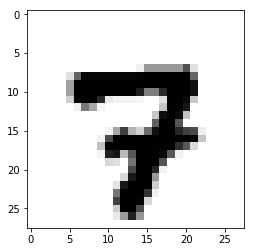

In [4]:
tmp = mnist.train.images[2]
tmp = tmp.reshape((28,28))

plt.imshow(tmp, cmap = cm.Greys)
plt.show()

In [5]:
wts = W.eval(sess)

In [7]:
cdict = {'red':   [(0.0,  1.0, 1.0),
                    (0.25,  1.0, 1.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'green': [(0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'blue':  [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)]}
redblue = matplotlib.colors.LinearSegmentedColormap('red_black_blue',cdict,256)

Digit 0


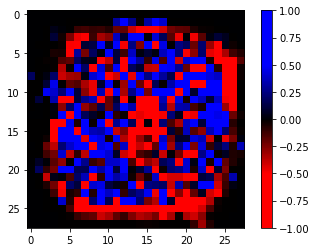

Digit 1


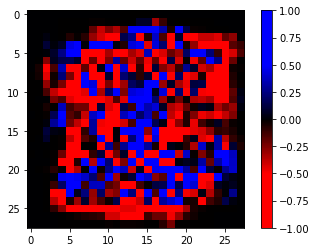

Digit 2


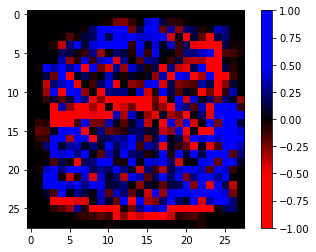

Digit 3


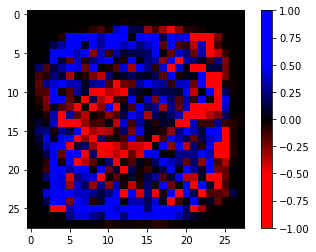

Digit 4


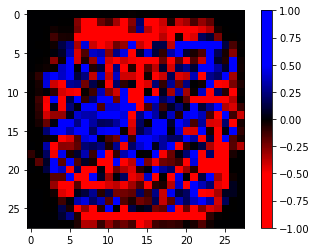

Digit 5


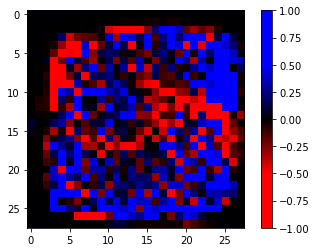

Digit 6


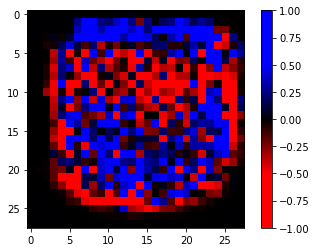

Digit 7


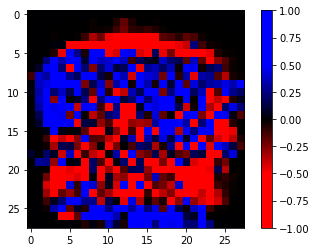

Digit 8


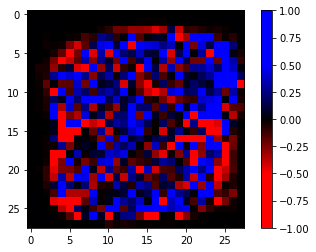

Digit 9


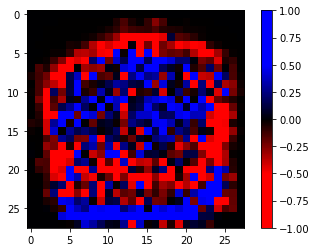

In [8]:
for i in range(0,10):
    im = wts.flatten()[i::10].reshape((28,-1))
    plt.imshow(im, cmap = redblue,clim=(-1.0, 1.0) )
    plt.colorbar()
    print "Digit %d" % i
    plt.show()

In [9]:
print wts.shape

(784, 10)
